**Importing The Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import StandardScaler

**Loading the dataset**

In [9]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data Wrangling**

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [21]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [22]:
df.shape

(1338, 6)

In [25]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
charges     1337
dtype: int64

**EDA**

In [28]:
corr= df.corr(method='pearson')

<AxesSubplot:>

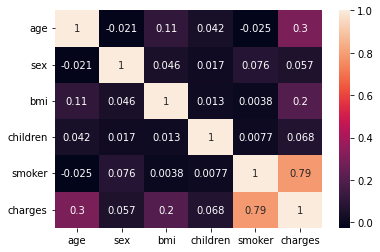

In [29]:
sns.heatmap(corr, annot=True)

In [37]:
px.bar(df, x='sex', y='charges')

In [39]:
px.scatter(df, x='age', y= 'bmi', color='smoker')

In [42]:
px.histogram(df,x='age', y='smoker', color='children')

**Machine Learning**

In [3]:
lb = LabelEncoder()

In [4]:
std = StandardScaler() 

In [10]:
df['sex']= lb.fit_transform(df['sex'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [11]:
df['smoker']= lb.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [12]:
df= df.drop('region', axis=1)
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [13]:
df[['age','bmi','children','smoker']]= std.fit_transform(df[['age','bmi','children','smoker']])

In [14]:
df

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,-0.908614,1.970587,16884.92400
1,-1.509965,1,0.509621,-0.078767,-0.507463,1725.55230
2,-0.797954,1,0.383307,1.580926,-0.507463,4449.46200
3,-0.441948,1,-1.305531,-0.908614,-0.507463,21984.47061
4,-0.513149,1,-0.292556,-0.908614,-0.507463,3866.85520
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,-0.507463,10600.54830
1334,-1.509965,0,0.206139,-0.908614,-0.507463,2205.98080
1335,-1.509965,0,1.014878,-0.908614,-0.507463,1629.83350
1336,-1.296362,0,-0.797813,-0.908614,-0.507463,2007.94500


In [15]:
x= df.iloc[:,:5]
x

,age,sex,bmi,children,smoker
0,-1.438764,0,-0.453320,-0.908614,1.970587
1,-1.509965,1,0.509621,-0.078767,-0.507463
2,-0.797954,1,0.383307,1.580926,-0.507463
3,-0.441948,1,-1.305531,-0.908614,-0.507463
4,-0.513149,1,-0.292556,-0.908614,-0.507463
...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,-0.507463
1334,-1.509965,0,0.206139,-0.908614,-0.507463
1335,-1.509965,0,1.014878,-0.908614,-0.507463
1336,-1.296362,0,-0.797813,-0.908614,-0.507463


In [16]:
y= df.iloc[:,5:]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [18]:
Model = LinearRegression()

In [19]:
Model.fit(X_train,Y_train)

LinearRegression()

In [21]:
Model.predict(X_test)

array([[ 4.29318183e+03],
       [ 1.26575229e+04],
       [ 1.28190691e+04],
       [ 1.34996799e+04],
       [ 1.08219565e+03],
       [ 3.20546812e+04],
       [ 1.31596373e+04],
       [ 1.17671549e+04],
       [ 3.39651274e+03],
       [ 3.03493602e+04],
       [ 1.15290334e+04],
       [ 1.75072812e+04],
       [ 9.04969968e+03],
       [ 8.70309437e+03],
       [ 3.70327689e+03],
       [ 1.06640059e+04],
       [ 3.89015588e+03],
       [ 7.22652590e+03],
       [ 1.53005572e+04],
       [ 1.46943585e+04],
       [ 1.19206048e+04],
       [ 3.34981376e+04],
       [ 8.98140565e+03],
       [ 9.37517781e+03],
       [ 2.64481960e+03],
       [ 8.00243294e+03],
       [ 8.87514893e+03],
       [ 1.12015396e+04],
       [ 7.97326363e+03],
       [ 3.97860099e+03],
       [ 1.43225934e+04],
       [ 6.14927578e+03],
       [ 3.42567695e+04],
       [ 2.72355482e+04],
       [ 3.39893782e+04],
       [ 9.43250083e+03],
       [ 3.10485068e+04],
       [ 2.72088914e+04],
       [ 1.5

In [22]:
Model.score(X_train, Y_train)

0.7535840232895

In [23]:
Model.score(X_test, Y_test)

0.7389093130276878